<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/SISTEM_OTOMASI_MODUL_STABILITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul Kestabilan

## Pencarian akar / pole
Pole adalah nilai $s$ yang membuat penyebut dari fungsi alih $G(𝑠)$ menjadi nol.
$$G(s)=\frac{Y(s)}{U(s)}  ⇒ akar-akar \ dari \ U(s)=0 $$

Contoh:

$$G(s)=\frac{1}{s^3+4s^2+6s-2}$$

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt

# Definisikan variabel simbolik
s = sp.symbols('s')

# Definisikan persamaan karakteristik
# Misal: s^3 + 4s^2 + 6s - 2 = 0
char_eq = s**3 + 4*s**2 + 6*s - 2
display(char_eq)

# Cari akar-akarnya (pole)
poles = sp.solve(char_eq, s)

# Tampilkan hasil
numeric_poles = [sp.N(p) for p in poles]

for i in numeric_poles:
  print("hasil dari numeric poles:",i)

s**3 + 4*s**2 + 6*s - 2

hasil dari numeric poles: -2.13908153639907 - 1.61689738910596*I
hasil dari numeric poles: -2.13908153639907 + 1.61689738910596*I
hasil dari numeric poles: 0.278163072798149


## Visualisasi Pole

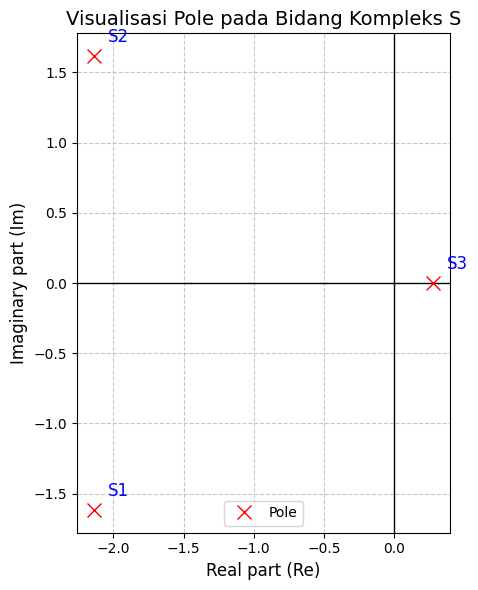

In [ ]:
# 5. Pisahkan real dan imajiner
real_parts = [sp.re(p) for p in numeric_poles]
imag_parts = [sp.im(p) for p in numeric_poles]

# 6. Plotting
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=1)  # sumbu horizontal
plt.axvline(0, color='black', linewidth=1)  # sumbu vertikal
plt.grid(True, linestyle='--', alpha=0.7)

# 7. Plot setiap pole
plt.plot(real_parts, imag_parts, 'rx', markersize=10, label='Pole')

# Tambahkan nama pole
for i, (x, y) in enumerate(zip(real_parts, imag_parts), start=1):
    plt.text(x + 0.1, y + 0.1, f"S{i}", fontsize=12, color='blue')

# 8. Label dan tampilan
plt.title("Visualisasi Pole pada Bidang Kompleks S", fontsize=14)
plt.xlabel("Real part (Re)", fontsize=12)
plt.ylabel("Imaginary part (Im)", fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
plt.show()


### Analisis Plot Real dan Imajiner

Dua pole pertama berada di sebelah kiri bidang $𝑠$ → ✅ Stabil.

Satu pole berada di sebelah kanan bidang $s$ (real positif) → ❌ Tidak stabil.


# Analisis Kestabilan Sistem Menggunakan Metode Routh-Hurwitz

## 🎯 Tujuan
Menentukan apakah sistem **stabil atau tidak stabil** dengan menghitung jumlah **pole di sisi kanan bidang s** (*right-half of s-plane*) **tanpa menyelesaikan akar-akar dari polinomial**.

---

## 🧮 Persamaan Karakteristik

$s^3 + 4s^2 + 6s - 2 = 0$

---

## 📋 Langkah-Langkah Menyusun Tabel Routh-Hurwitz

### ✅ 1. Ambil Koefisien
Koefisien dari persamaan karakteristik:

$$[[1, \quad 4, \quad 6, \quad -2]]$$
Dari suku-suku:
$$ ( s^3 \rightarrow 1 )
( s^2 \rightarrow 4 )
( s^1 \rightarrow 6 )
( s^0 \rightarrow -2 )$$

---

### ✅ 2. Susun Dua Baris Pertama

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $(s^3)$ | 1       | 6       |
| $(s^2)$ | 4       | -2      |

---

### ✅ 3. Hitung Baris \(s^1\)


$$\frac{(4 \cdot 6) - (1 \cdot -2)}{4} = \frac{24 + 2}{4} = 6.5$$

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $s^1$) | 6.5     | 0       |

---

### ✅ 4. Hitung Baris \(s^0\)

$$\frac{(6.5 \cdot -2) - (4 \cdot 0)}{6.5} = -2$$

| Baris   | Kolom 1 |
|---------|---------|
| $(s^0)$ | -2      |

---

## 🔍 Tabel Akhir Routh-Hurwitz

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $(s^3)$ | 1       | 6       |
| $(s^2)$ | 4       | -2      |
| $(s^1)$ | 6.5     | 0       |
| $(s^0)$ | -2      |         |

---

## 🧭 Analisis Tanda Kolom Pertama

$$(s^3 = +1)$$
$$(s^2 = +4)$$
$$(s^1 = +6.5)$$
$$(s^0 = -2)$$

🔄 **Perubahan tanda terjadi antara $(s^1)$ dan $(s^0)$  
➡️ **Jumlah perubahan tanda: 1**

---

## ✅ Kesimpulan

- **Jumlah perubahan tanda = 1**
- Maka terdapat **1 pole di sisi kanan bidang ($s$)**.
- Artinya, sistem ini **tidak stabil**.

---

## 📌 Catatan Tambahan
Metode Routh-Hurwitz **tidak memberikan nilai pasti dari pole**, tetapi **dapat menentukan kestabilan sistem** hanya dengan memeriksa tanda pada kolom pertama tabel.


## Kode Program Routh-Hurwitz

In [1]:
import sympy as sp

def routh_hurwitz_sympy(coeffs):
    n = len(coeffs)
    m = (n + 1) // 2  # jumlah kolom

    # Inisialisasi tabel Routh
    routh = [[sp.sympify(0) for _ in range(m)] for _ in range(n)]

    # Baris pertama dan kedua
    routh[0][:] = coeffs[0::2]  # even index: s^n, s^{n-2}, ...
    routh[1][:] = coeffs[1::2]  # odd index: s^{n-1}, s^{n-3}, ...

    # Hitung baris-baris berikutnya
    for i in range(2, n):
        for j in range(m - 1):
            a = routh[i - 2][0]
            b = routh[i - 2][j + 1] if j + 1 < m else 0
            c = routh[i - 1][0]
            d = routh[i - 1][j + 1] if j + 1 < m else 0

            if c == 0:
                c = sp.Symbol('ε')  # ε untuk menghindari pembagian nol

            routh[i][j] = sp.simplify((c * b - a * d) / c)

        # Jika baris penuh nol → gunakan turunan baris sebelumnya (case khusus)
        if all(elt == 0 for elt in routh[i]):
            order = n - i
            prev_row = routh[i - 1]
            routh[i] = [(order - 2 * k) * prev_row[k] for k in range(m)]
            break

    return routh

# Contoh penggunaan: s^3 + 4s^2 + 6s - 2
s = sp.symbols('s')
coeffs = [1, 4, 6, -2]

# Buat tabel Routh-Hurwitz
routh_table = routh_hurwitz_sympy(coeffs)

# Tampilkan tabel
print("Tabel Routh-Hurwitz:")
for i, row in enumerate(routh_table):
    print(f"s^{len(coeffs)-i-1}:\t", row)

# Hitung perubahan tanda pada kolom pertama
first_col = [row[0] for row in routh_table]
signs = [sp.sign(sp.N(x)) for x in first_col]
changes = sum(signs[i] != signs[i+1] for i in range(len(signs) - 1))

print(f"\nJumlah perubahan tanda pada kolom pertama: {changes}")
if changes == 0:
    print("Sistem stabil.")
else:
    print(f"Sistem tidak stabil: terdapat {changes} pole di sisi kanan bidang s.")


Tabel Routh-Hurwitz:
s^3:	 [1, 6]
s^2:	 [4, -2]
s^1:	 [6.50000000000000, 0]
s^0:	 [-2.00000000000000, 0]

Jumlah perubahan tanda pada kolom pertama: 1
Sistem tidak stabil: terdapat 1 pole di sisi kanan bidang s.


## Close Loop Controller

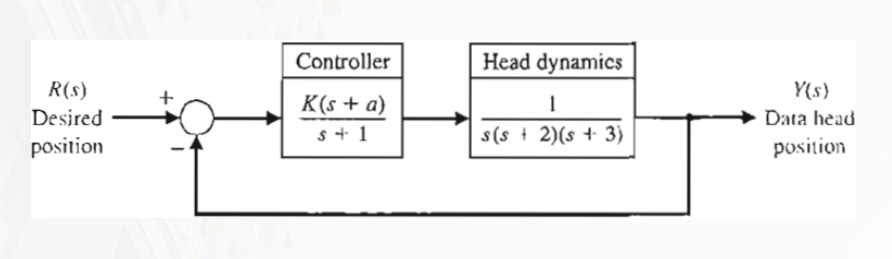

$$E(s)=R(s)−Y(s)$$
$$Y(s)=G_c(s)G_p(s)⋅(R(s)−Y(s))$$
$$Y(s)=G_c(s)G_p(s)R(s)−G_c(s)G_p(s)Y(s)$$
$$Y(s)+G_c(s)G_p(s)Y(s)=G_c(s)G_p(s)R(s)$$
## Faktorkan
$$Y(s)(1+G_c(s)G_p(s))=G_c(s)G_p(s)R(s)$$
$$\frac{Y(s)}{R(s)}=\frac{G_c(s)G_p(s)}{1+G_c(s)G_p(s)}$$

## Head Position Control System

Open Loop Transfer Function
$$G(s)=G_c(s)G_p(s)$$
$$G(s)=\frac{K(s+a)}{s(s+1)(s+2)(s+3)}$$

In [4]:
  import sympy as sp

# 1. Definisikan variabel simbolik
s, K, a = sp.symbols('s K a')

# 2. Definisikan fungsi alih controller dan plant
Gc = K * (s + a) / (s + 1)                   # Gc(s) = K(s + a)/(s + 1)
Gp = 1 / (s * (s + 2) * (s + 3))             # Gp(s) = 1 / [s(s+2)(s+3)]

# 3. Hitung fungsi alih loop terbuka
G_open_loop = sp.simplify(Gc * Gp)

# 4. Hitung fungsi alih loop tertutup (closed-loop transfer function)
T_s = sp.simplify(G_open_loop / (1 + G_open_loop))

# 5. Tampilkan hasil
print("Fungsi alih loop terbuka G(s):")
display(G_open_loop)

print("\nFungsi alih loop tertutup T(s):")
display(T_s)


Fungsi alih loop terbuka G(s):


K*(a + s)/(s*(s + 1)*(s + 2)*(s + 3))


Fungsi alih loop tertutup T(s):


K*(a + s)/(K*(a + s) + s*(s + 1)*(s + 2)*(s + 3))

In [10]:
numerator = sp.numer(G_open_loop)
denominator = sp.denom(G_open_loop)

# Kalikan silang: D(s) = penyebut loop tertutup
D_s = sp.simplify(denominator + numerator)

# 5. Tampilkan hasil
print("Persamaan karakteristik sistem:")
display(D_s.expand())

Persamaan karakteristik sistem:


K*a + K*s + s**4 + 6*s**3 + 11*s**2 + 6*s

In [14]:
import sympy as sp

# 1. Definisikan simbol
s, K, a = sp.symbols('s K a')

# 2. Persamaan karakteristik dari loop tertutup:
# s^4 + 6s^3 + 11s^2 + (6 + K)s + Ka
char_eq = s**4 + 6*s**3 + 11*s**2 + (6 + K)*s + K*a

# 3. Ekstrak koefisien karakteristik dalam urutan dari s^4 ke s^0
coeffs = sp.Poly(char_eq, s).all_coeffs()
n = len(coeffs)
m = (n + 1) // 2  # jumlah kolom

# 4. Inisialisasi tabel Routh-Hurwitz
routh = [[sp.sympify(0) for _ in range(m)] for _ in range(n)]

# Baris pertama dan kedua (isi dan padding 0)
routh[0][:] = coeffs[::2] + [0] * (m - len(coeffs[::2]))
routh[1][:] = coeffs[1::2] + [0] * (m - len(coeffs[1::2]))

# 5. Hitung baris-baris selanjutnya
for i in range(2, n):
    for j in range(m - 1):
        a = routh[i - 2][0]
        b = routh[i - 2][j + 1]
        c = routh[i - 1][0]
        d = routh[i - 1][j + 1]
        routh[i][j] = sp.simplify((c * b - a * d) / c if c != 0 else 0)

    # Tangani baris nol penuh (khusus)
    if all(el == 0 for el in routh[i]):
        order = n - i
        prev_row = routh[i - 1]
        routh[i] = [(order - 2 * k) * prev_row[k] for k in range(m)]
        break

# 6. Cetak Tabel Routh-Hurwitz
print("Tabel Routh-Hurwitz:")
for i, row in enumerate(routh):
    power = f"s^{n - i - 1}"
    print(f"{power.ljust(4)}: {row}")

row_labels = [f"s^{n - i - 1}" for i in range(n)]
# 7. Analisis Syarat Kestabilan (Kolom pertama harus > 0)
print("\nSyarat kestabilan (semua elemen kolom pertama harus positif):")
for label, row in zip(row_labels, routh):
    print(f"{label}: {row[0]} > 0")

Tabel Routh-Hurwitz:
s^4 : [1, 11, K*a]
s^3 : [6, K + 6, 0]
s^2 : [10 - K/6, K*a, 0]
s^1 : [(36*K*a + (K - 60)*(K + 6))/(K - 60), 0, 0]
s^0 : [K*a, 0, 0]

Syarat kestabilan (semua elemen kolom pertama harus positif):
s^4: 1 > 0
s^3: 6 > 0
s^2: 10 - K/6 > 0
s^1: (36*K*a + (K - 60)*(K + 6))/(K - 60) > 0
s^0: K*a > 0
